In [1]:
import pandas as pd 
import numpy as np
from scipy.io import arff
import seaborn as sns

# Introdução
#### Neste trabalho foi analisada as informações do dataset emotions.arff que contem informações sobre musicas e os sentimentos que elas proporcionam,feito os devidos preprocessamentos e após isso foi utilizado dois algoritimos de inteligência artificial com intuito de prever os sentimentos provocados pelas musicas e discutir seus resultados   

In [2]:
#abre os dados
data = arff.loadarff('emotions.arff')
loadData = pd.DataFrame(data[0])
loadData

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,2.0,0.261742,0.002657,1.149211,b'0',b'0',b'1',b'1',b'1',b'0'
589,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,2.0,0.282122,0.052218,0.335371,b'1',b'0',b'0',b'0',b'1',b'1'
590,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,2.0,0.184313,0.247136,0.476993,b'0',b'0',b'1',b'1',b'1',b'0'
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,2.0,0.547126,0.183494,1.255820,b'0',b'1',b'1',b'0',b'0',b'0'


In [3]:
# cria a matriz de correlação
import matplotlib.pyplot as plt

corr = loadData.corr()
corr.style.background_gradient(cmap='coolwarm')

#### Após a abertura dos dados foi percebido uma grande quantidade de colunas, então foi aberta a matriz de correlação para verificar a possibilidade de remover dados com alta correlação para evitar a priorização de algum dado em especifico, e também é feita a checagem da existência de dados duplicados ou faltantes.

In [4]:
#checagem de valores faltando ou duplicados
print('Valores faltando: ', loadData.isnull().sum)
print('Valores duplicados: ', loadData.duplicated())

Valores faltando:  <bound method DataFrame.sum of      Mean_Acc1298_Mean_Mem40_Centroid  Mean_Acc1298_Mean_Mem40_Rolloff  \
0                               False                            False   
1                               False                            False   
2                               False                            False   
3                               False                            False   
4                               False                            False   
..                                ...                              ...   
588                             False                            False   
589                             False                            False   
590                             False                            False   
591                             False                            False   
592                             False                            False   

     Mean_Acc1298_Mean_Mem40_Flux  Mean_Acc1298_Mean_Mem40_MF

#### Após a verificação foi percebido que não há existência de dados duplicados ou faltantes, a partir disso no codigo abaixo é feito o percorrimento da matrix de correlação e é feita remoção de atributos com mais de 70% de correlação

In [5]:
#diminuição da matriz da correlção para atributos com mais de 70% de correlação
corr_matrix = loadData.corr().abs()
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column]>0.70)]
corr_smatrix = loadData.drop(corr_matrix[to_drop],axis=1)
corr_smatrix


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,Mean_Acc1298_Mean_Mem40_MFCC_7,...,Std_Acc1298_Std_Mem40_MFCC_7,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighLowRatio,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,0.615074,2.037160,0.804065,1.301409,0.558576,0.672063,...,0.115849,0.051035,68.0,2.0,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,-0.218145,0.163038,0.620251,0.458514,0.041426,0.308287,...,0.059393,0.295031,70.0,2.0,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,0.639047,1.281297,0.757896,0.489412,0.627636,0.469322,...,0.109279,0.161574,61.0,3.0,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,0.648848,1.754870,1.495532,0.739909,0.809644,0.460945,...,0.155513,0.043012,66.0,2.0,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,1.064262,0.899152,0.890336,0.702328,0.490685,0.796904,...,0.222804,0.029308,100.0,2.0,b'0',b'0',b'0',b'1',b'0',b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,1.927310,1.696017,0.397888,0.857559,0.302742,0.672649,...,0.146845,0.089991,87.0,2.0,b'0',b'0',b'1',b'1',b'1',b'0'
589,0.094829,0.204498,0.082824,-61.364436,0.627740,1.440352,0.856243,1.110282,0.394450,0.726323,...,0.115185,0.035827,65.0,2.0,b'1',b'0',b'0',b'0',b'1',b'1'
590,0.035169,0.065403,0.075227,-81.750533,0.092224,0.818851,1.569606,1.831909,0.057216,0.419342,...,0.137076,0.033681,88.0,2.0,b'0',b'0',b'1',b'1',b'1',b'0'
591,0.054276,0.238158,0.095935,-71.009724,1.547197,2.407780,0.618838,0.997950,0.825143,0.758816,...,0.112750,0.155650,84.0,2.0,b'0',b'1',b'1',b'0',b'0',b'0'


#### Feita a remoção outro problema existente precisa ser tratado: a classes que queremos predizer estão informando seu valor em string ao invés de apenas em números e ainda existem musicas que pertecem a mais de uma classe, para solucionar esse problema foi feito primeiro a transformação dessas strings para número e após isso é criada uma nova coluna no dataset que contém as informações das tabelas anteriores e tranformando musicas que perteciam a duas ou mais classes em um nova classe contendo as anteriores

In [6]:
#tranformação dos atributos qualitativos para quantitativos
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for columns in corr_smatrix.columns:
     if corr_smatrix[columns].dtypes == 'object':
        corr_smatrix[columns] = le.fit_transform(corr_smatrix[columns])



In [7]:

classe = []
for i in range(len(loadData)):
    classe.append('')
    
for i in range(len(loadData)):
    if corr_smatrix['amazed-suprised'][i] == 1:
        classe[i] = classe[i] + 'surprised-'
    if corr_smatrix['happy-pleased'][i] == 1:
        classe[i] = classe[i] + 'happy-'
    if corr_smatrix['relaxing-calm'][i] == 1:
        classe[i] = classe[i] + 'relaxing-'
    if corr_smatrix['quiet-still'][i] == 1:
        classe[i] = classe[i] + 'still-'
    if corr_smatrix['sad-lonely'][i] == 1:
        classe[i] = classe[i] + 'lonely-'
    if corr_smatrix['angry-aggresive'][i] == 1:
        classe[i] = classe[i] + 'angry-'
        
        

In [8]:
corr_smatrix['Classe'] = classe
corr_smatrix.drop(['angry-aggresive','amazed-suprised','happy-pleased','relaxing-calm','quiet-still','sad-lonely'],axis=1,inplace = True)



#### Pelo histograma abaixo é possível ver a diferença das amostras de cada classe tendo inclusive classes com apenas um elemento para solucionar esse problema foi utilizada a técnica de oversamplingpara gerar novas classes de maneira a equilibrar a base de dados 

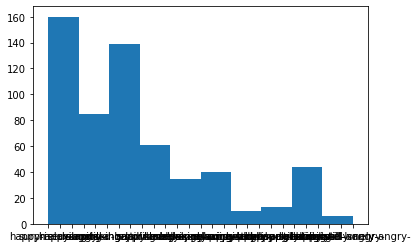

surprised-angry-             81
happy-relaxing-              74
angry-                       72
relaxing-still-lonely-       67
relaxing-                    42
surprised-happy-             38
still-lonely-                37
relaxing-still-              30
relaxing-lonely-             25
surprised-                   24
happy-                       23
lonely-angry-                12
lonely-                      12
surprised-happy-relaxing-    11
surprised-happy-angry-        7
happy-relaxing-still-         6
surprised-lonely-             6
happy-angry-                  5
still-                        5
surprised-lonely-angry-       4
relaxing-angry-               3
relaxing-lonely-angry-        3
surprised-relaxing-           2
relaxing-still-angry-         1
happy-still-                  1
still-lonely-angry-           1
happy-lonely-                 1
Name: Classe, dtype: int64

In [9]:
plt.hist(corr_smatrix['Classe'])
plt.show()
corr_smatrix.Classe.value_counts()

#### Aqui é feito tanto o oversample como a tranformação dos nomes das classes para números

Using TensorFlow backend.


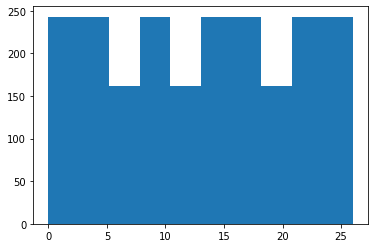

25    81
24    81
2     81
4     81
6     81
8     81
10    81
12    81
14    81
16    81
18    81
20    81
22    81
26    81
23    81
1     81
3     81
5     81
7     81
9     81
11    81
13    81
15    81
17    81
19    81
21    81
0     81
Name: Classe, dtype: int64

In [10]:
from imblearn.over_sampling import RandomOverSampler
X = corr_smatrix[corr_smatrix.columns[:-1]].values
y = corr_smatrix['Classe'].values

ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_sample(X,y)
corr_smatrix = pd.DataFrame(data = X_resampled, columns = corr_smatrix.columns[:-1])

corr_smatrix['Classe'] = y_resampled


corr_smatrix['Classe'] = le.fit_transform(corr_smatrix['Classe'])
plt.hist(corr_smatrix['Classe'])
plt.show()
corr_smatrix.Classe.value_counts()


#### Após analise dos boxplots abaixo e das médias foi encontrada a existencia de outliers o que resultou na normalização da base passo feito após a divisão da base em treino e teste em ambos modelos implementados

<bound method DataFrame.mean of       Mean_Acc1298_Mean_Mem40_Centroid  Mean_Acc1298_Mean_Mem40_Rolloff  \
0                             0.034741                         0.089665   
1                             0.081374                         0.272747   
2                             0.110545                         0.273567   
3                             0.042481                         0.199281   
4                             0.074550                         0.140880   
...                                ...                              ...   
2182                          0.047676                         0.117463   
2183                          0.046965                         0.109535   
2184                          0.046965                         0.109535   
2185                          0.046965                         0.109535   
2186                          0.047676                         0.117463   

      Mean_Acc1298_Mean_Mem40_Flux  Mean_Acc1298_Mean_Mem40_MFCC_0 

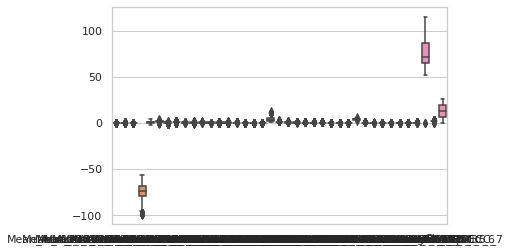

In [11]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=corr_smatrix);
corr_smatrix.mean

#### Feito isso passamos a implementação do primeiro algoritimo, o knn (K-Nearest neighboor) que consiste em a partir da quantidade de vizinhos predizer a qual vizinho um dado está relacionado observando sua semelhança com ele.

In [12]:
from sklearn import cluster, neighbors, svm, metrics, preprocessing 
trainSample = corr_smatrix.sample(frac=0.8, random_state = 1) #seleção de 80% da base para treinamento
testSample = pd.concat([corr_smatrix, trainSample]).drop_duplicates(keep=False)
trainTarget = trainSample["Classe"] #define o atributo alvo da base para o treinamento
testTarget = testSample["Classe"]
del testSample["Classe"]
del trainSample["Classe"]
rs = preprocessing.RobustScaler()
trainSample = rs.fit_transform(trainSample)
testSample = rs.fit_transform(testSample)
scores = {}
scores_list = []
k_range = range(1,27)
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, algorithm="auto") #k vizinhos mais próximos = n_neighbors
    knn.fit(trainSample, trainTarget)
    resultKNN = knn.predict(testSample)
    scores[k] = metrics.accuracy_score(testTarget, resultKNN)
    scores_list.append(metrics.accuracy_score(testTarget, resultKNN))

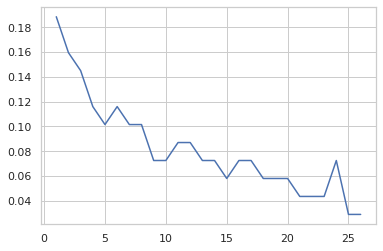

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)


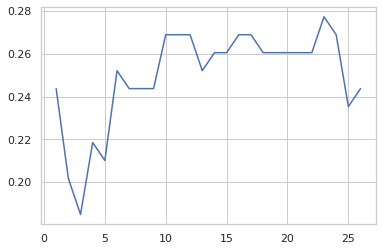

In [14]:
from IPython.display import Image

Image("vizinhanças.png")

#### temos dois graficos acima o primeiro mostrar os scores com o oversampling e segundo os scores sem o oevrsampling como pode ser observado sem o balanceamento da base o knn acerta mais visto que ele vai acertar mais as classes majoritarias e errar as minoritárias já com o balaceamento ele tenda sempre a errar mais 

In [19]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
call = 38
test = corr_smatrix.sample(frac = 0.2)
train = corr_smatrix.drop(test.index)

train_X = train.drop(columns=['Classe'])
train_y = train[['Classe']]

x_test = test.drop(columns=['Classe'])
y_test = test[['Classe']]

train_X = rs.fit_transform(train_X)
x_test = rs.fit_transform(x_test)

model = Sequential()
model.add(Dense(38,activation = 'relu',input_dim=call))
model.add(Dropout(0.3))
model.add(Dense(48,activation = 'relu',input_dim=call))
model.add(Dense(64,activation = 'relu',input_dim=call))
model.add(Dense(124,activation = 'relu',input_dim=call))
model.add(Dense(200,activation = 'relu',input_dim=call))
model.add(Dense(27,activation = 'softmax',input_dim=call))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_X,train_y, epochs=20,batch_size = 20,validation_data=(x_test,y_test))




Train on 1750 samples, validate on 437 samples
Epoch 1/20
1750/1750 [==============================] - 2s 878us/step - loss: 2.9526 - accuracy: 0.1600 - val_loss: 2.4329 - val_accuracy: 0.2860
Epoch 2/20
1750/1750 [==============================] - 1s 339us/step - loss: 2.1663 - accuracy: 0.3577 - val_loss: 1.8618 - val_accuracy: 0.4462
Epoch 3/20
1750/1750 [==============================] - 1s 314us/step - loss: 1.8121 - accuracy: 0.4509 - val_loss: 1.5665 - val_accuracy: 0.5240
Epoch 4/20
1750/1750 [==============================] - 1s 382us/step - loss: 1.5663 - accuracy: 0.5097 - val_loss: 1.3878 - val_accuracy: 0.5652
Epoch 5/20
1750/1750 [==============================] - 1s 356us/step - loss: 1.4049 - accuracy: 0.5657 - val_loss: 1.2336 - val_accuracy: 0.6384
Epoch 6/20
1750/1750 [==============================] - 1s 349us/step - loss: 1.3247 - accuracy: 0.5794 - val_loss: 1.1481 - val_accuracy: 0.6728
Epoch 7/20
1750/1750 [==============================] - 1s 364us/step - loss:

In [20]:
y_pred = model.predict(x_test)
y_pred = y_pred>0.5
y_pred = np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.82      0.16        11
           1       0.67      0.29      0.40        14
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00        16
           5       0.95      1.00      0.97        18
           6       1.00      1.00      1.00        12
           7       1.00      0.67      0.80        18
           8       1.00      0.88      0.94        17
           9       1.00      0.38      0.55        16
          10       1.00      1.00      1.00        14
          11       0.86      0.55      0.67        22
          12       0.86      1.00      0.92        12
          13       1.00      0.59      0.74        17
          14       1.00      1.00      1.00        17
          15       0.56      0.29      0.38        17
          16       0.89      1.00      0.94        17
          17       0.69    

/home/arnaud/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### A rede neural acima foi projetada visando o mesmo proposito do k-nn o de classificação, mas como pode-se observar o seu resultado é bem melhor e aqui foram usadas diversas métricas de avaliação: a acurácia para medir em termos mais gerais o acerto da rede tanto no treino quanto na validação, a precisão de  quantas vezes cada classe foi efetivamente predita corretamente pois por levar em consideração os falsos positivos essa métrica já é mais confialvel que a acurácia , a sensibilidade que nos mostra com que frequencia cada classe é predita corretamente e o f1 que é uma maneira de juntar os dois métodos de avaliações anteriores em um unico valor

#### A principal diferença em ambas a métricas é que a precisão considera em seu calculo a classificação correta e quantas vezes a rede classificou um objeto pertencente a uma classe diferente como pertencente a essa classe (um objeto da classe 26 sendo previsto como da classe 25, por exemplo) , já o recall mede em quantas vezes a rede conseguiu classificar corretamente uma classe x ou seja ela leva em consideração os falsos negativos (quantas a classe 26 apreceu e não foi predita corretamente, por exemplo),dessa forma temos o acerto efetivo da rede diferente da acurácia que mede apenas o quanto foi o acerto, desconsiderando os falsos positivos e falsos negativos. 


#### Analisando os valores médios encontrados: 
#### Uma precisão média de 0.85 significa que em oitenta e sete por cento dos casos em que a rede neural previu uma classe,ela efetivamente acertou.
#### Já uma sensibilidade de 0.73 significa que em setenta e sete por cento dos casos em que uma classe apareceu ela foi efetivamente acertada
#### Vale salientar que os valores de precisão apresentaram variação de 0.4, o mesmo apresentado pela sensibilidade e que ao testar com épocas diferentes o aumento dos valores não foram significantes. 


# Conclusão:
#### A rede neural apresenta um desempenho muito superior ao k-nn o que é esperado pela diferença de complexidade de ambos.